# Логистическая регрессия

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Данные
Однажды был проведён такой эксперимент - на 5000 участниках проверяли, как возраст и физическое здоровье влияют на потерю слуха, особенно на способность слышать высокие тона. Результаты этого эксперимента находятся в .csv-файле. У каждого участника есть возраст, оценка его физического здоровья, и результат аудио-теста (прошёл/не прошёл), проверяющего способность слышать высокие частоты. Сможем ли мы построить модель, которая будет предсказывать способность человека слышать высокие тона звука, основываясь только на его возрасте и физическом здоровье?

* Признаки
  * age - возраст участников, в годах
  * physical_score - оценка физического здоровья, полученная в результате физических тестов
* Целевая переменная (Label/Target)
  * test_result - 0 если аудио-тест не пройден, 1 если аудио-тест пройден

In [2]:
df = pd.read_csv('../DATA/hearing_test.csv')
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


## Анализ и визуализация данных

In [3]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


Для колонки age - диапазон значений от 18 до 90, среднее значение 51. Для колонки physical_score - диапазон значений от 0 до 50, среднее значение 32.

In [4]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

3000 человек прошли тест, 2000 не прошли.

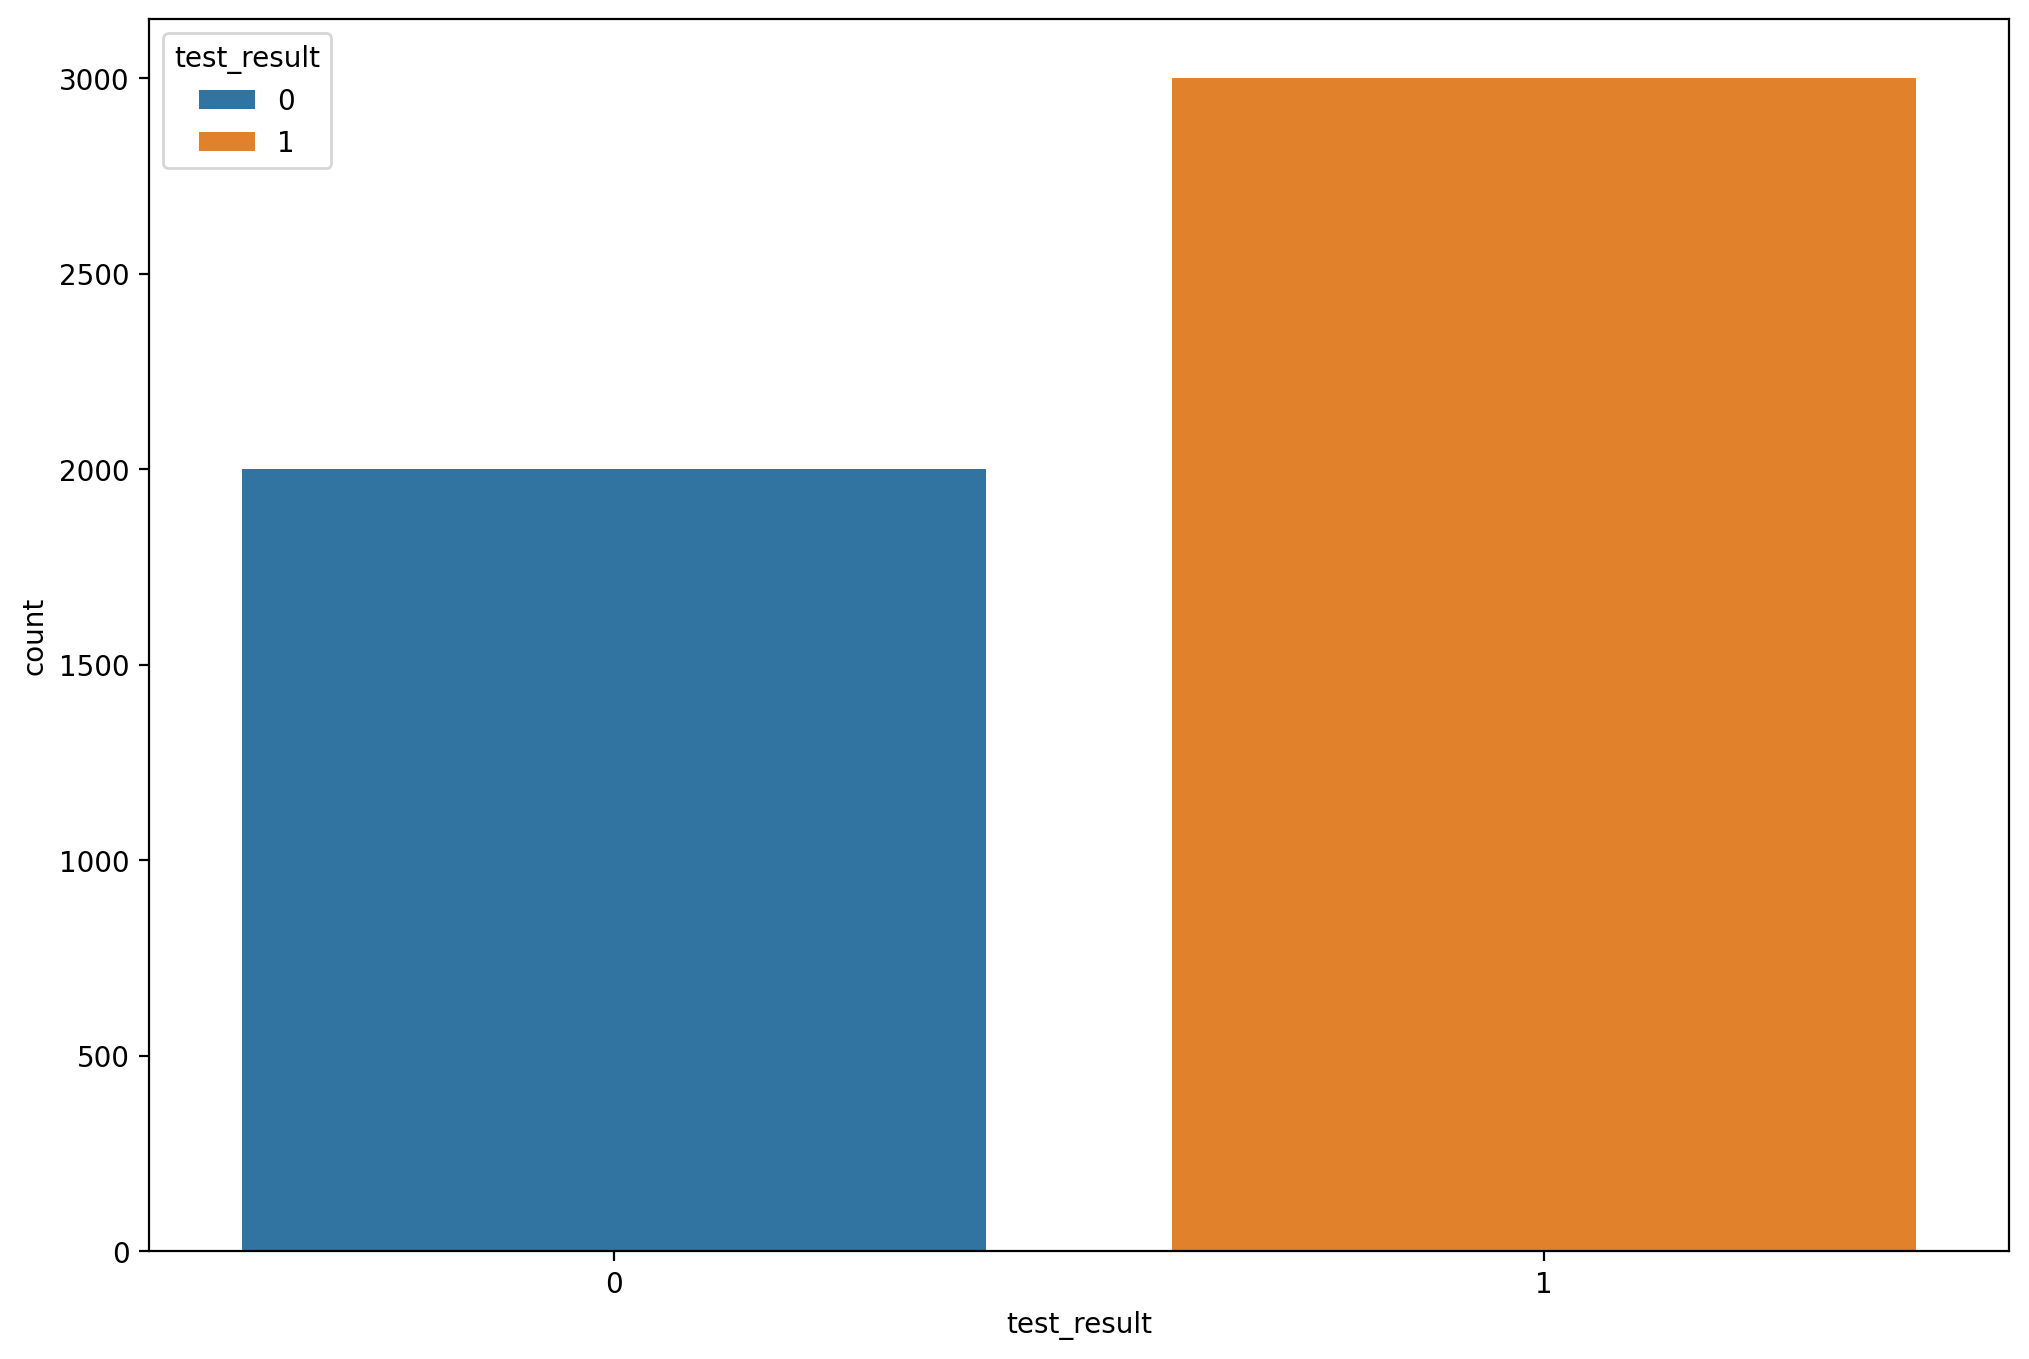

In [9]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='test_result', hue='test_result')
plt.show()

Теперь посмотрим распределение признаков с помощью графика boxplot

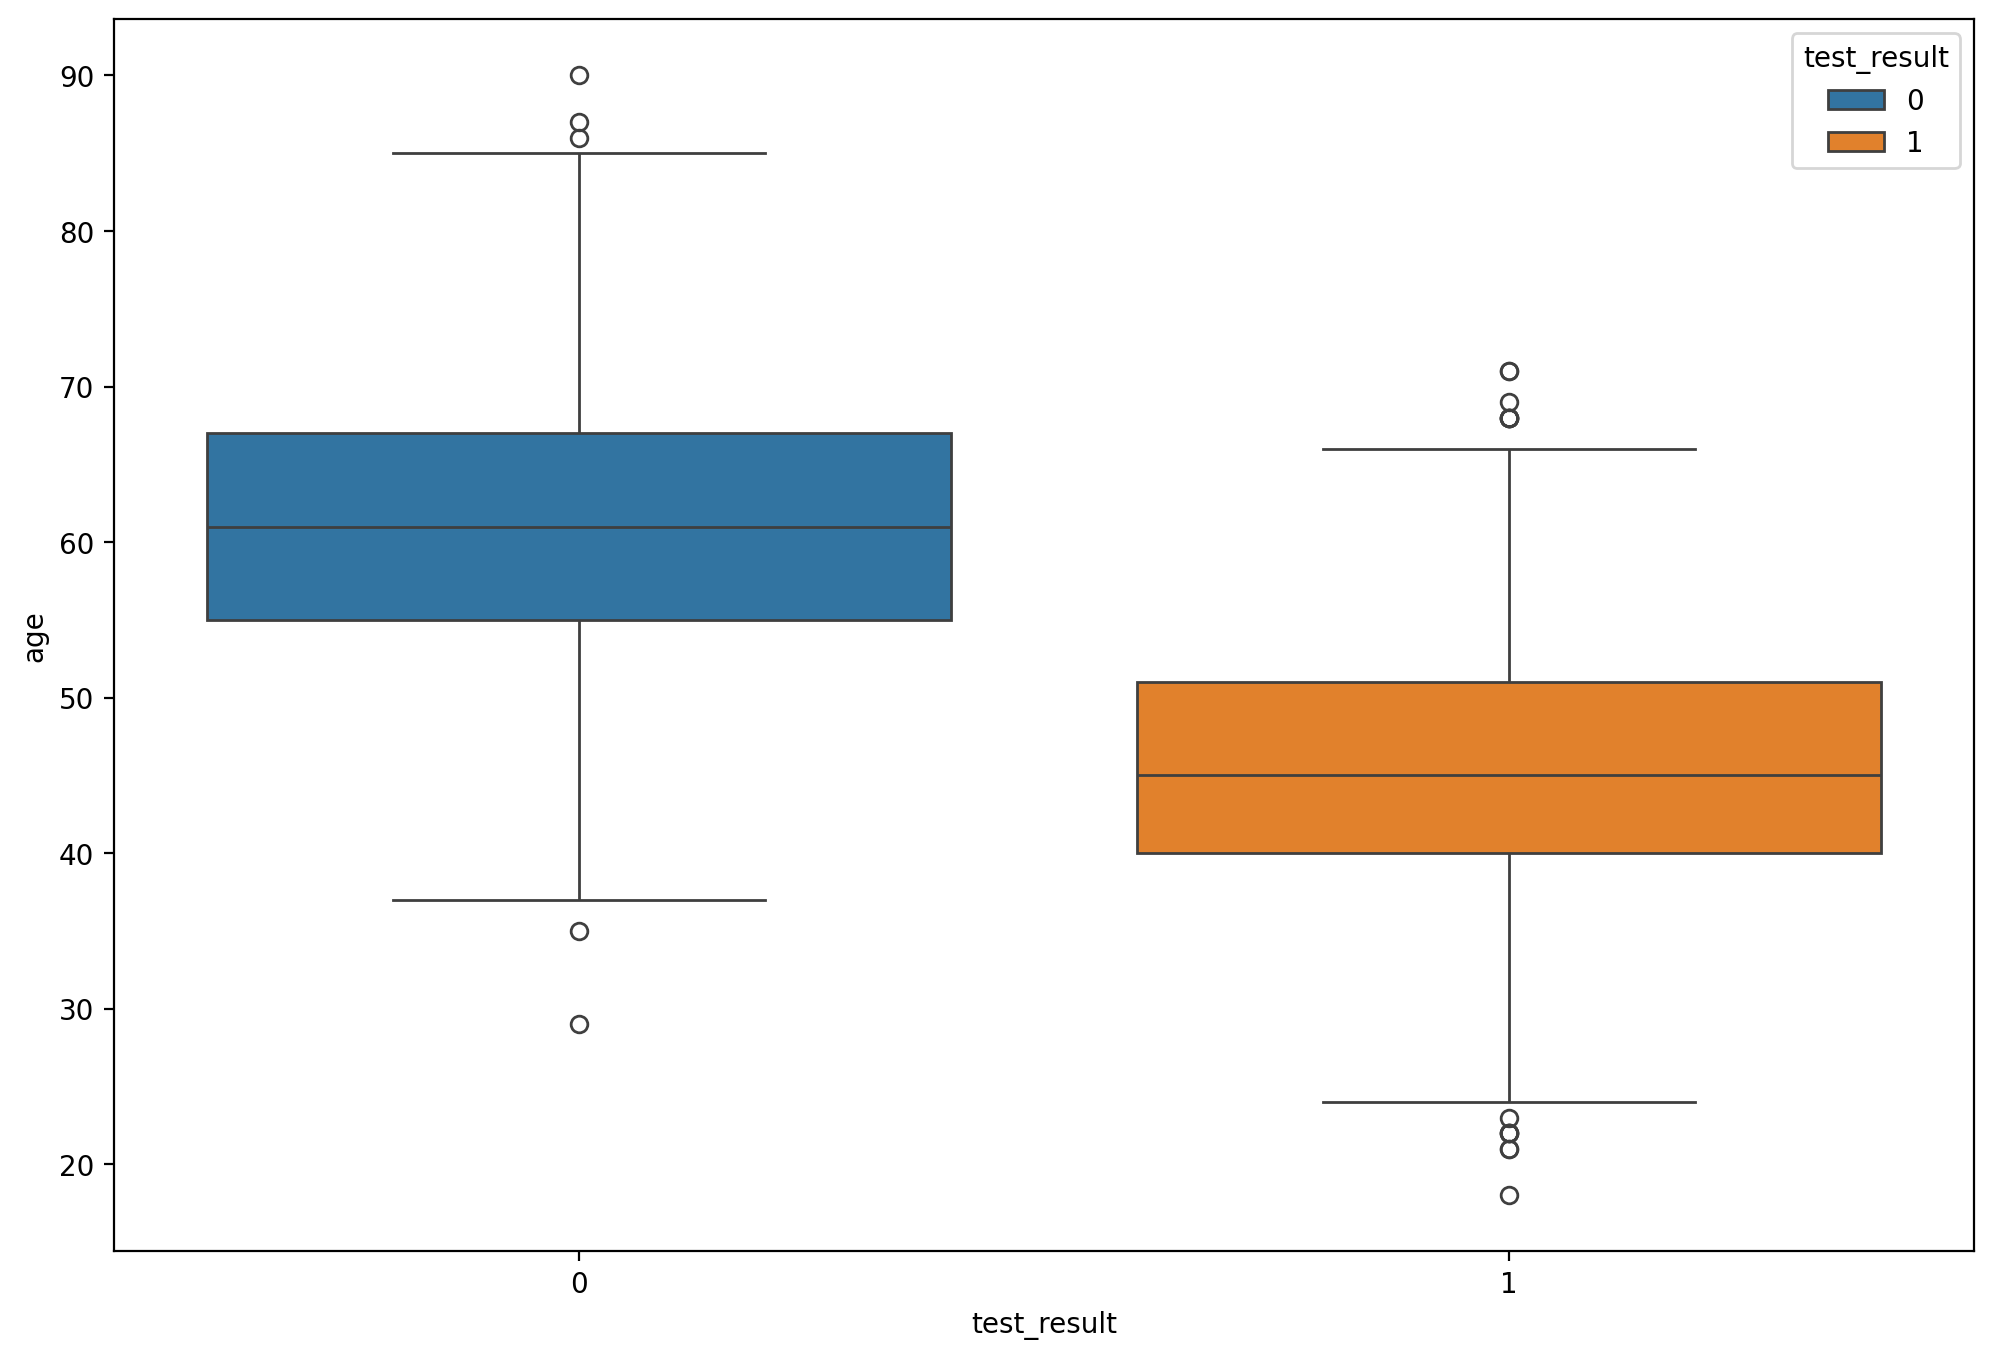

In [11]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxplot(data=df, x='test_result', y='age', hue='test_result')
plt.show()

По данному графику мы можем сделать вывод о том, что результат прохождения теста зависит от возраста человека. Те, кто не прошёл тест, в среднем, намного старше тех, кто прошел.

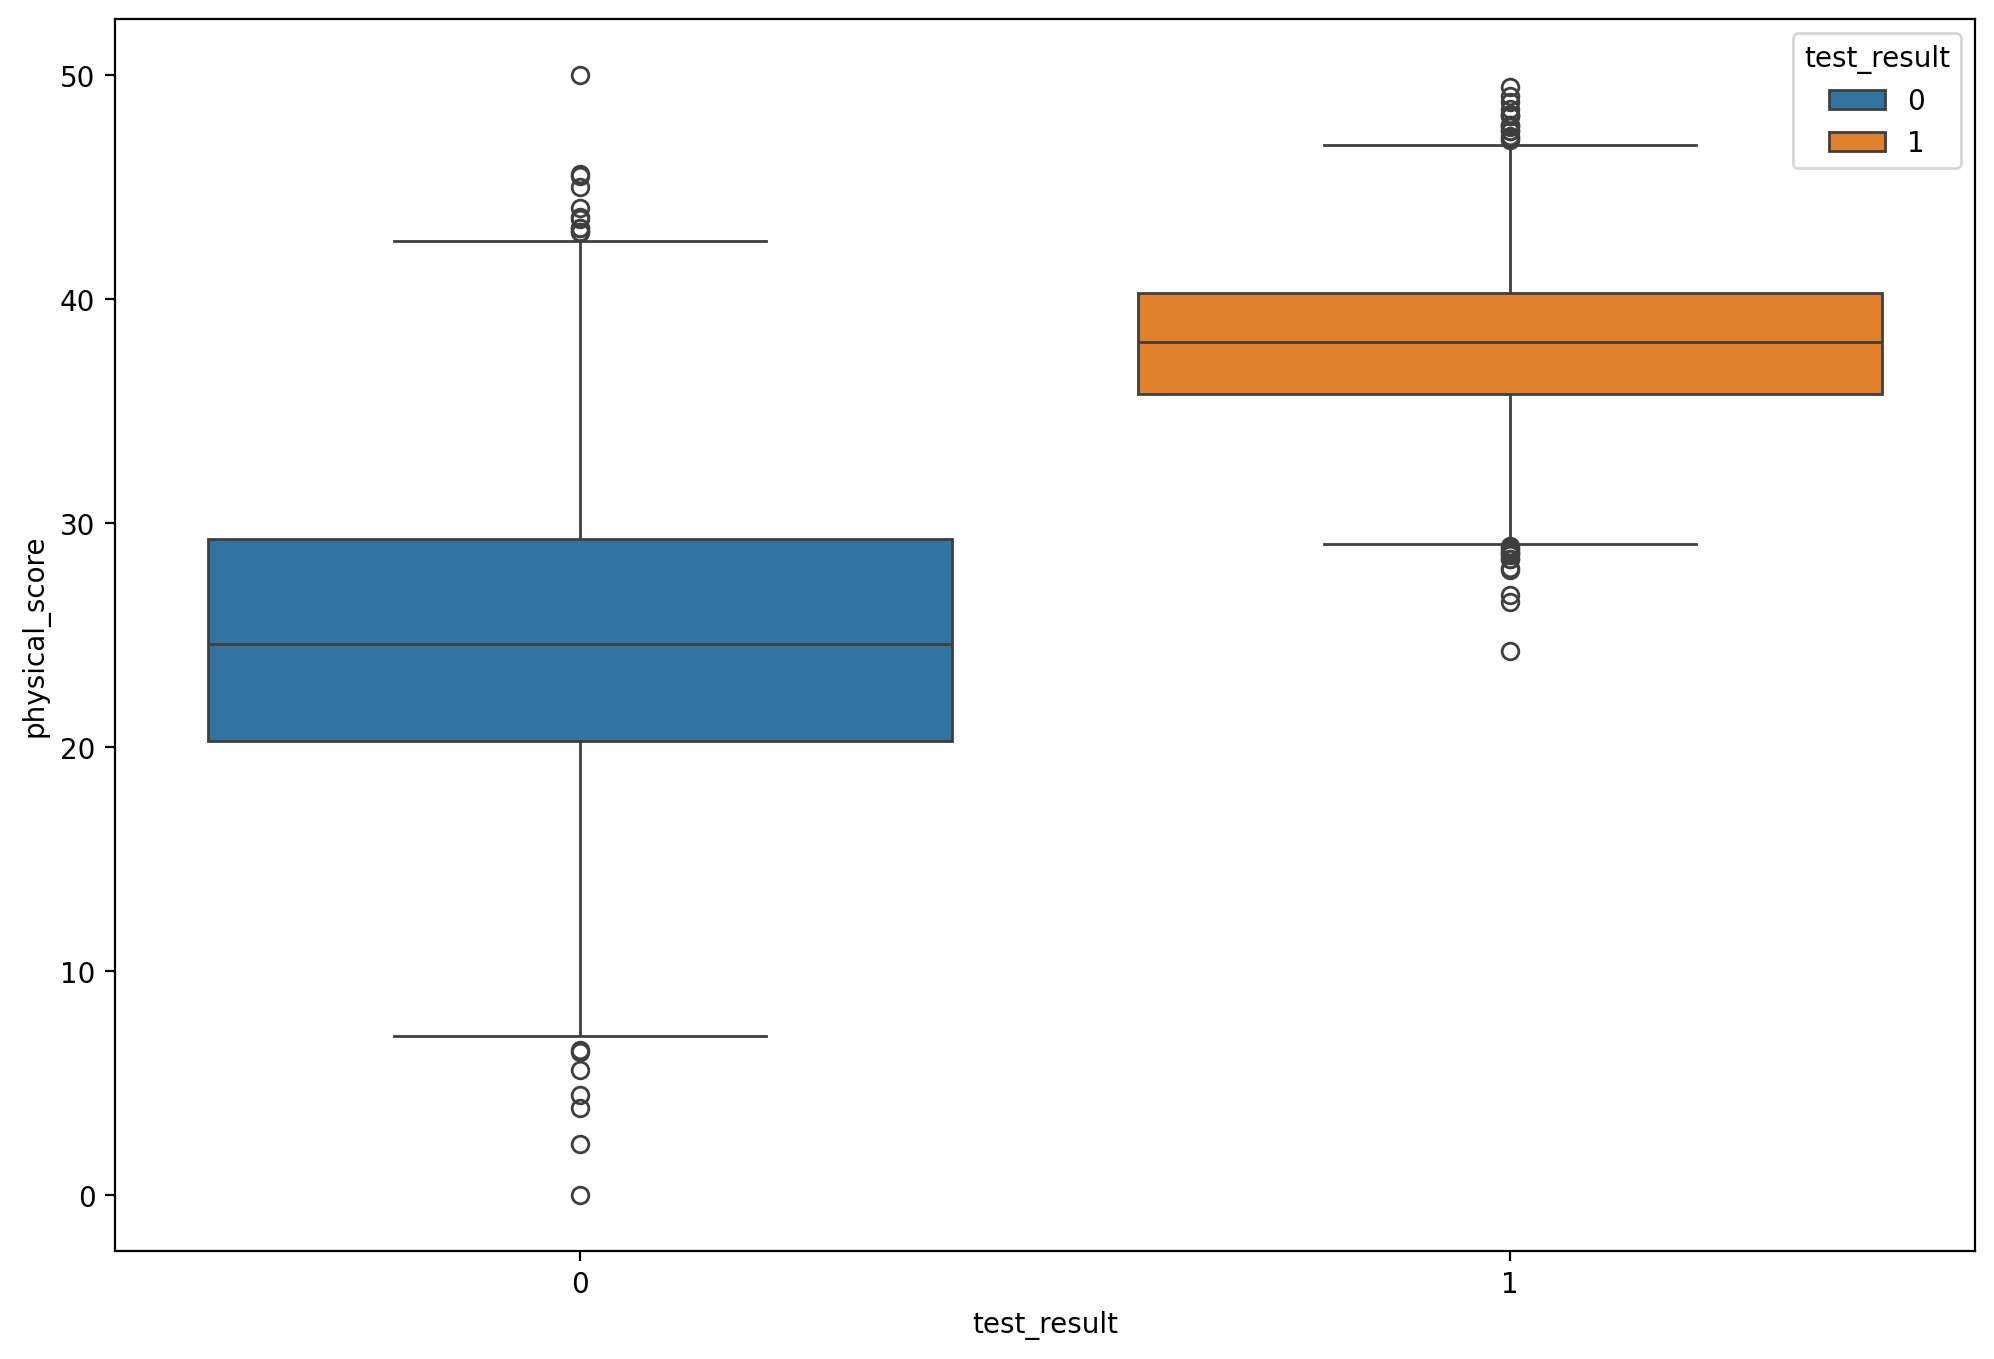

In [13]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxplot(data=df, x='test_result', y='physical_score', hue='test_result')
plt.show()

По данному графику мы можем сделать вывод о том, что те, кто прошел тест - имеют заметно лучшие physical_score, чем те, кто не прошёл. При этом распределение данных для тех кто не прошёл тест, имеет значительно больший диапазон различных значений. А для данных тех кто прошел тест, имеет место более компактное распределение.

Теперь можем иследовать как связаны признаки age и physical_score между собой. Для этого построим график scatterplot

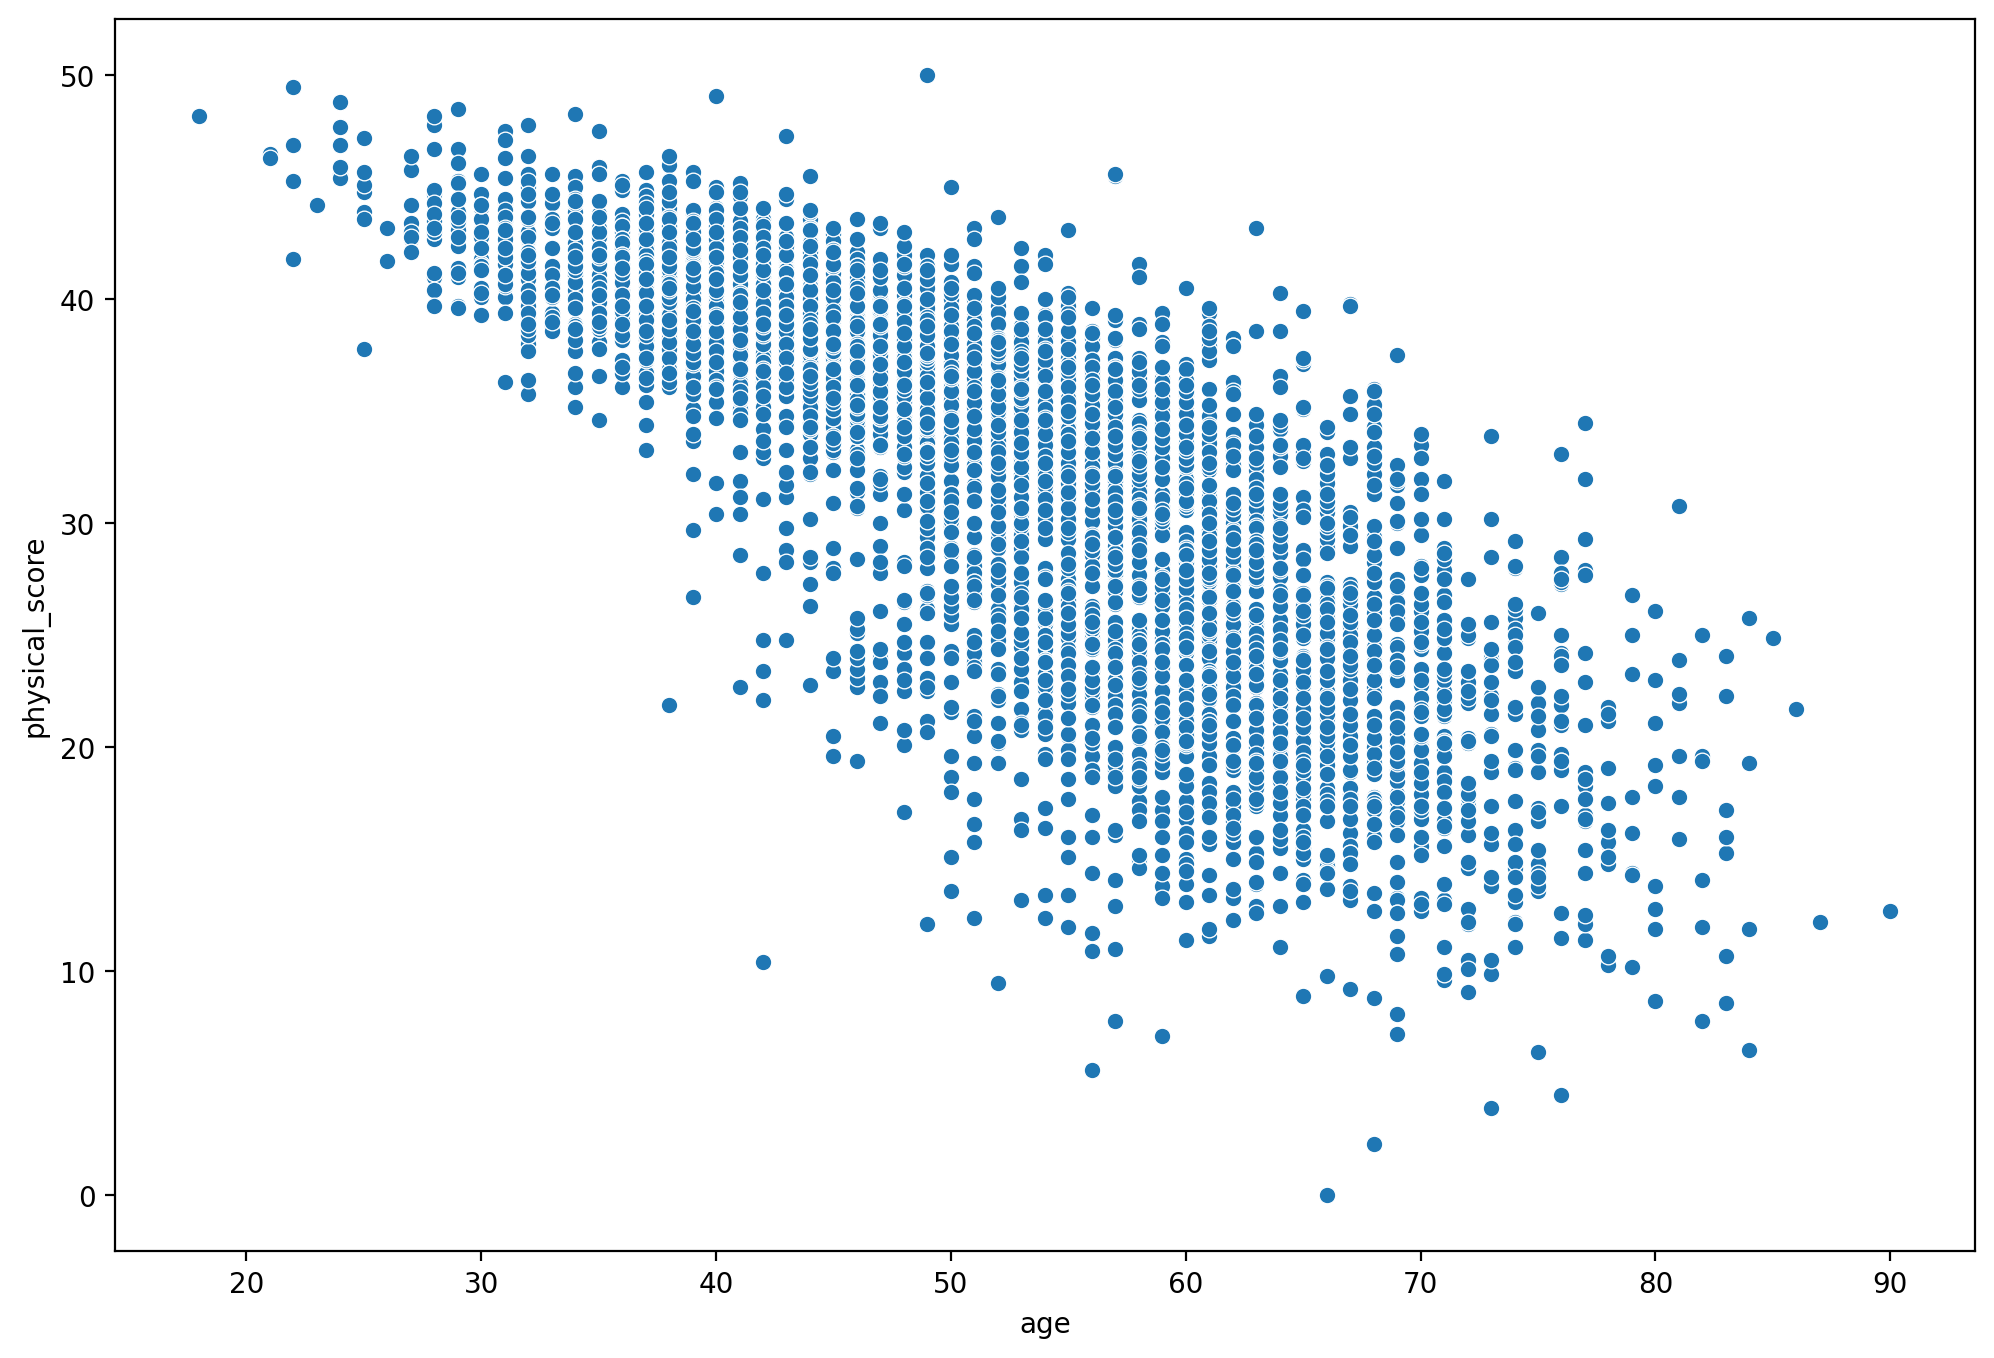

In [15]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=df, x='age', y='physical_score')
plt.show()

По данному графику мы можем сделать вывод о том, что чем больше значение age, тем меньше становится значение physical_score.

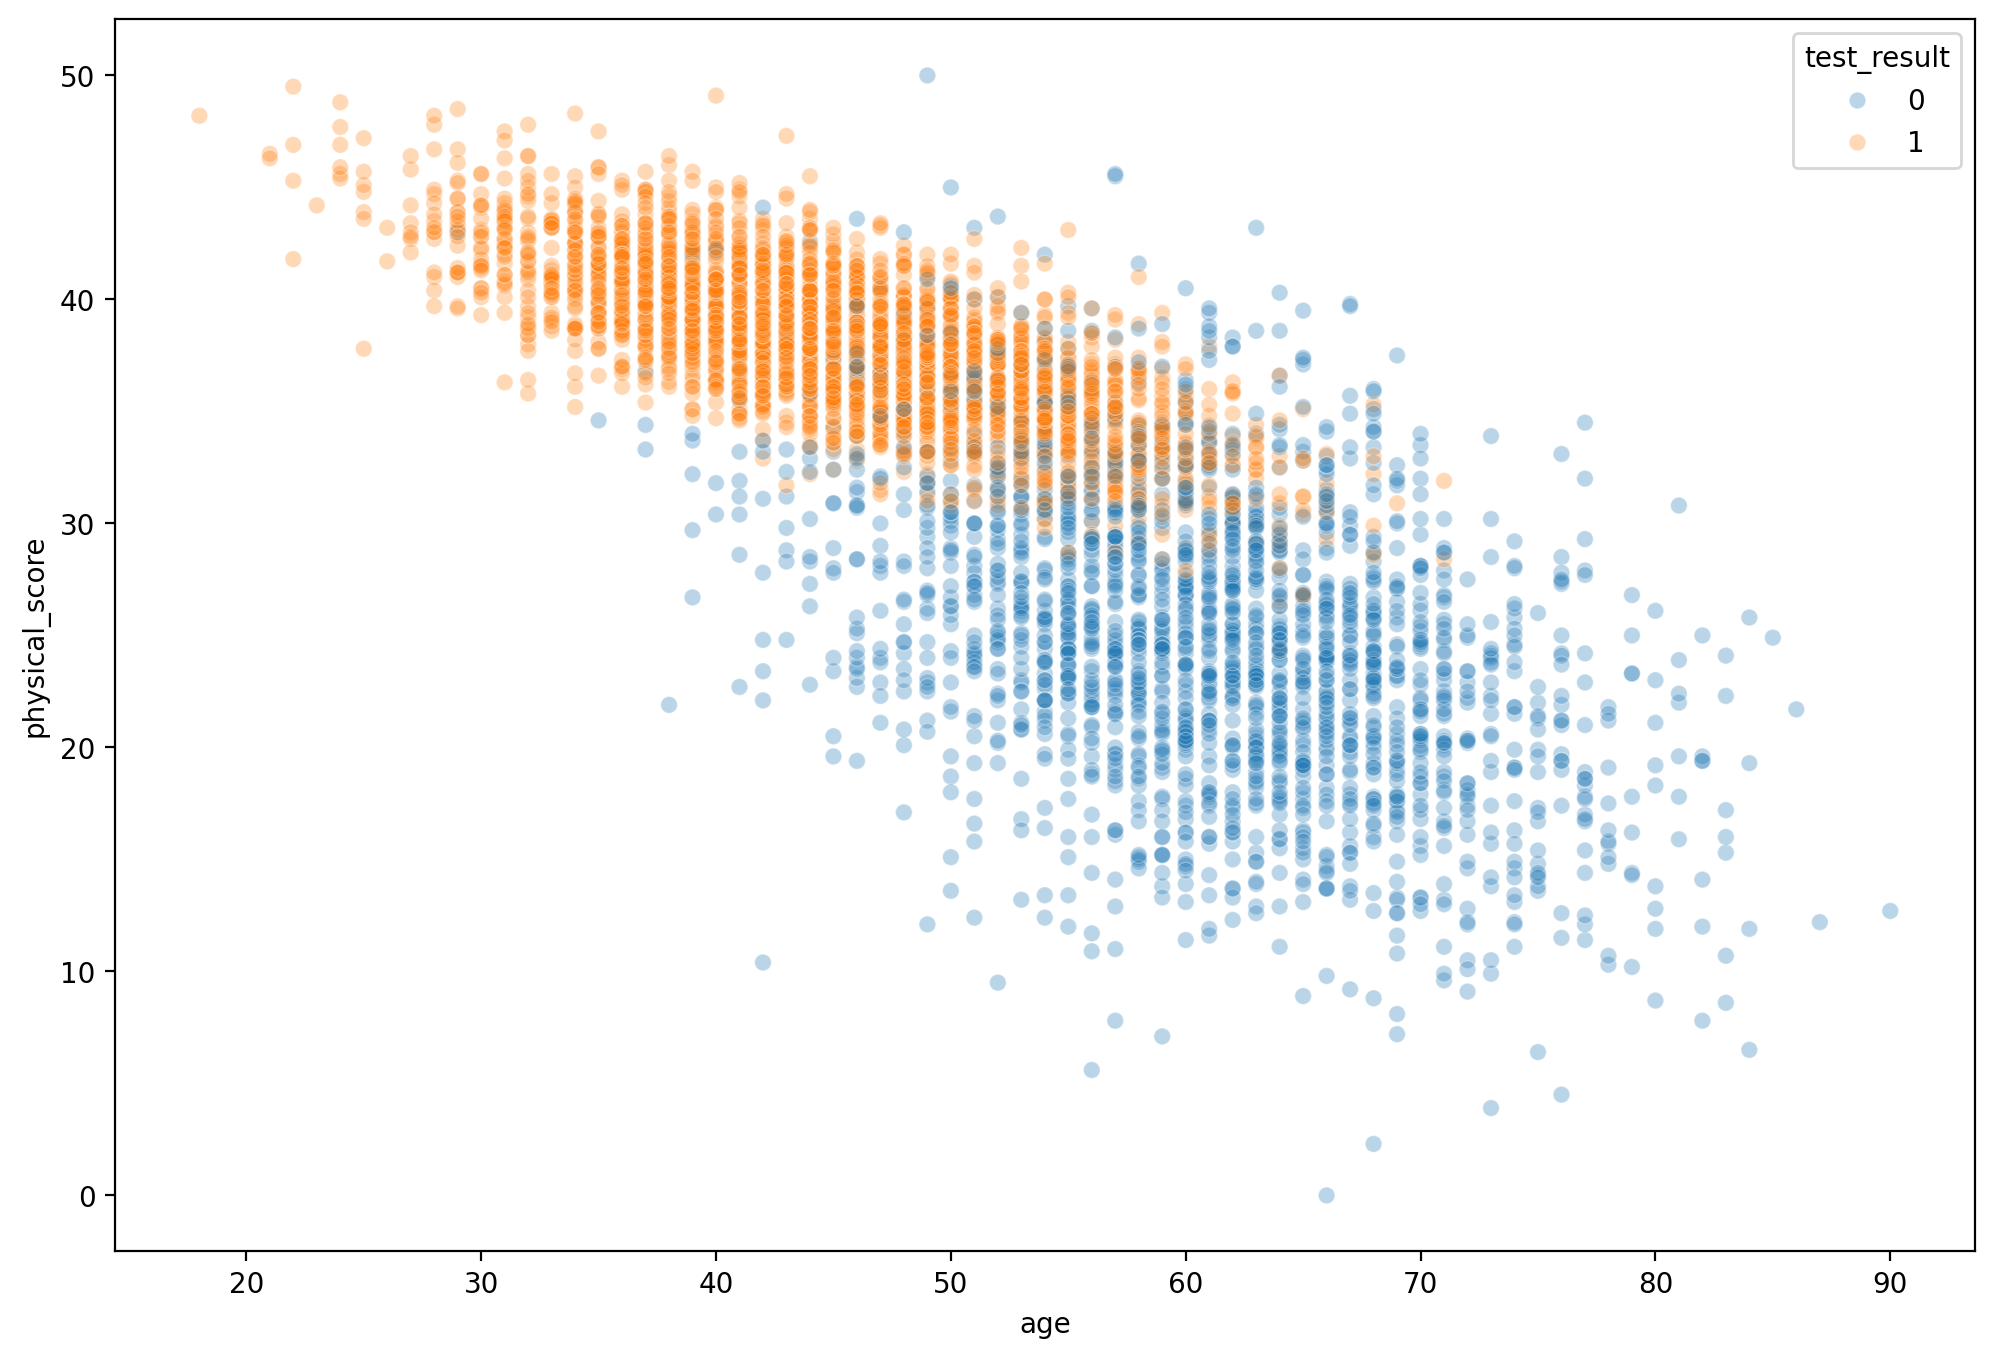

In [17]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result', alpha=0.3)
plt.show()

На этом графике мы видим два кластера с точками - более молодые участники чаще проходят аудиотест, чем более старшие участники.

<Figure size 2400x1600 with 0 Axes>

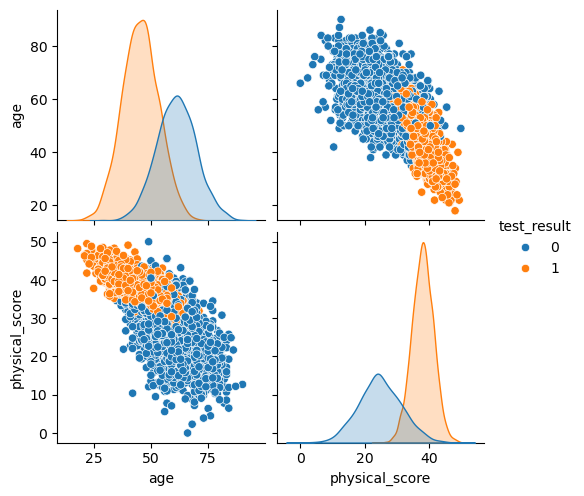

In [19]:
plt.figure(figsize=(12, 8), dpi=200)
sns.pairplot(data=df, hue='test_result')
plt.show()

Для задачи классификации на данном графике можно увидеть в более сжатом виде всю ту информацию, которая отображалась на предыдущих графиках. Распределение каждого из признаков, а также зависимость между признаками.

Можно также посмотреть на корреляцию колонок с помощью heatmap

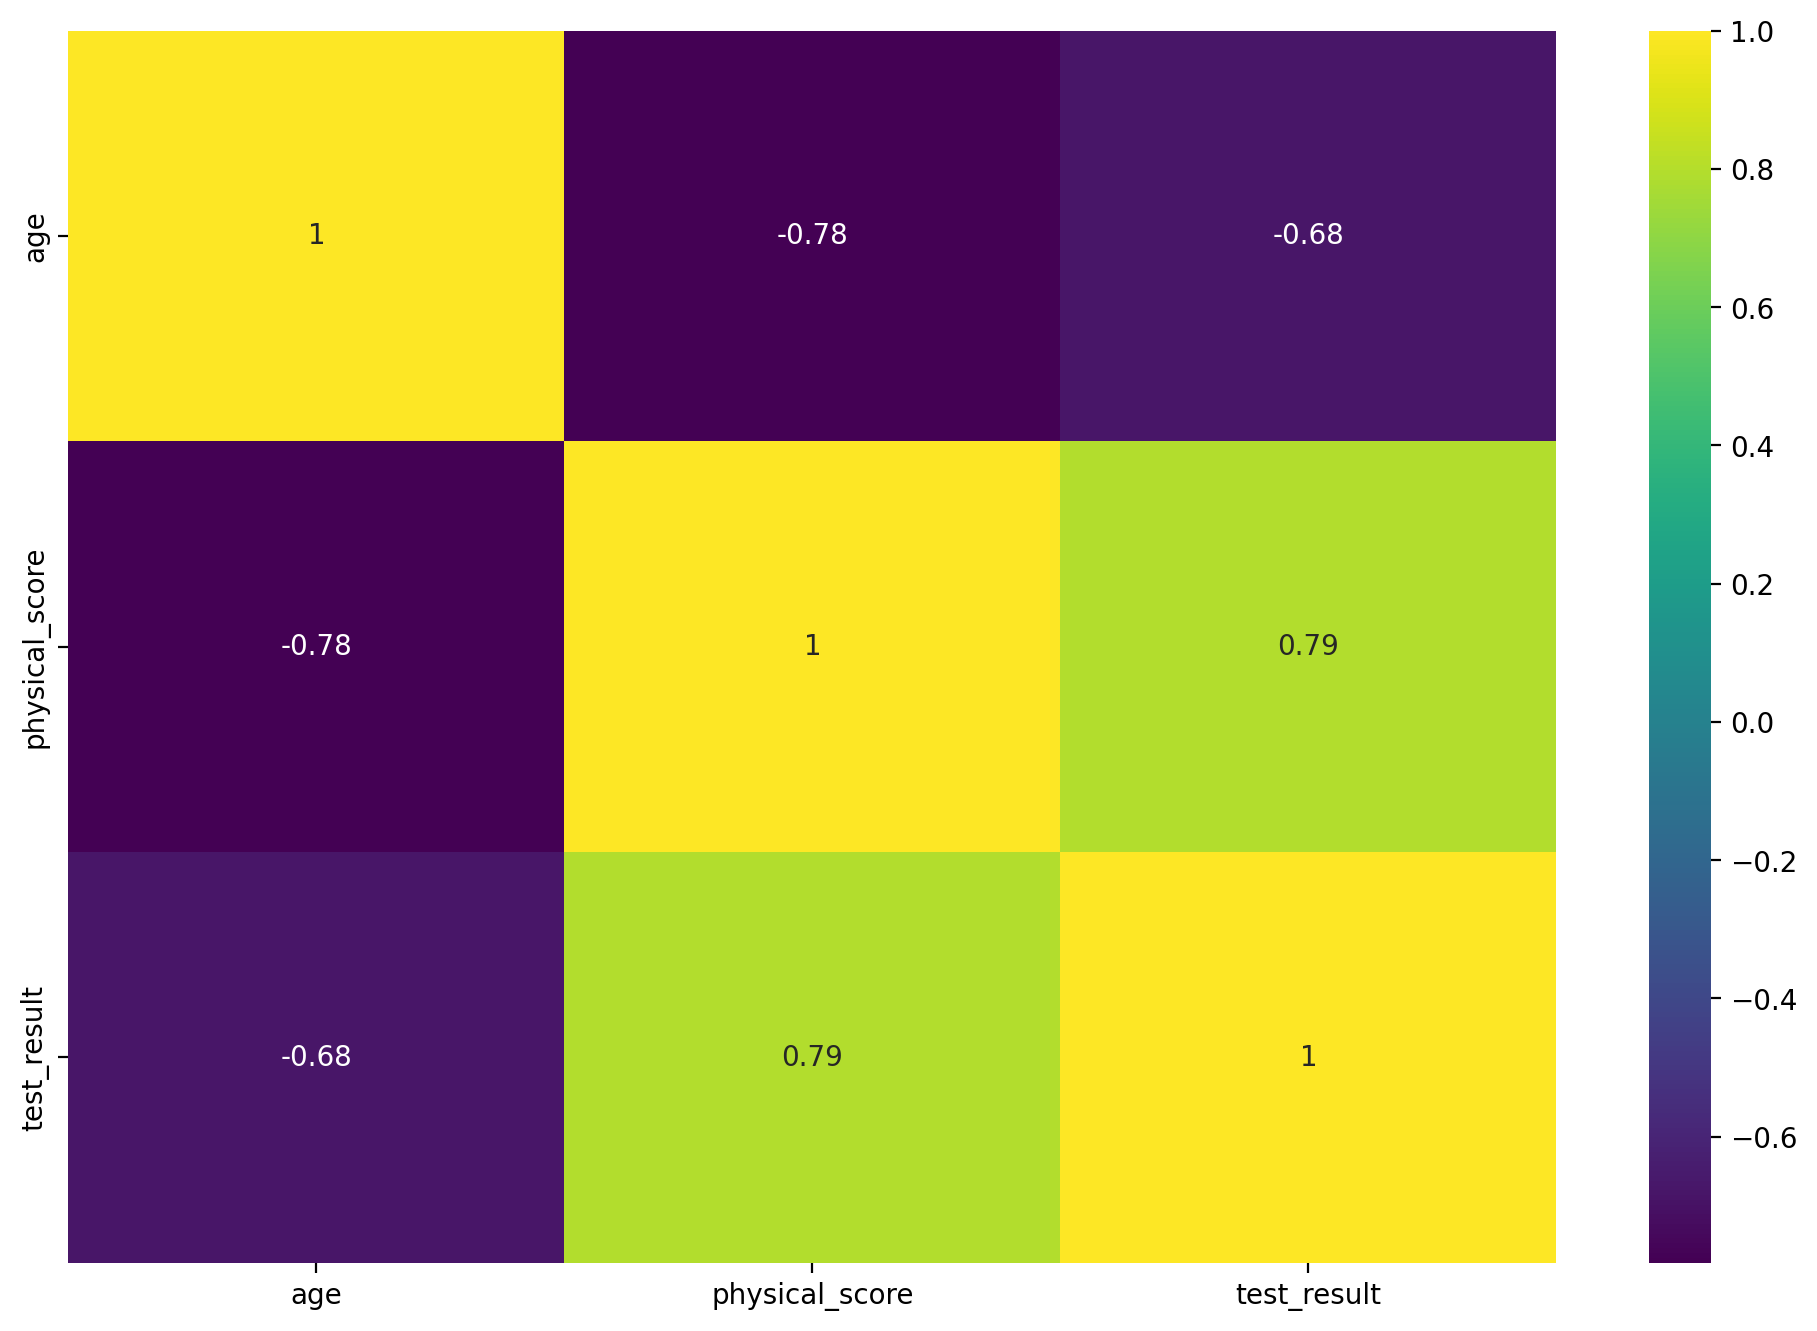

In [21]:
plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='viridis')
plt.show()

На данном графике мы всегда получим единицу по диагонали - так как любая колонка идеально коррелирует сама с собой. Для признака physical_score наблюдается заметная положительная корреляция с целевой переменной. Для признака age и целевой переменной наблюдается заметная отрицательная корреляция, т.е. с увеличением признака - целевая переменная уменьшается, а не увеличивается.

Иногда графики scatterplot могут быть недостаточно информативны, особенно когда один из признаков является категориальным. В таких случаях эти графики можно улучшить нарисовав трехмерные графики.

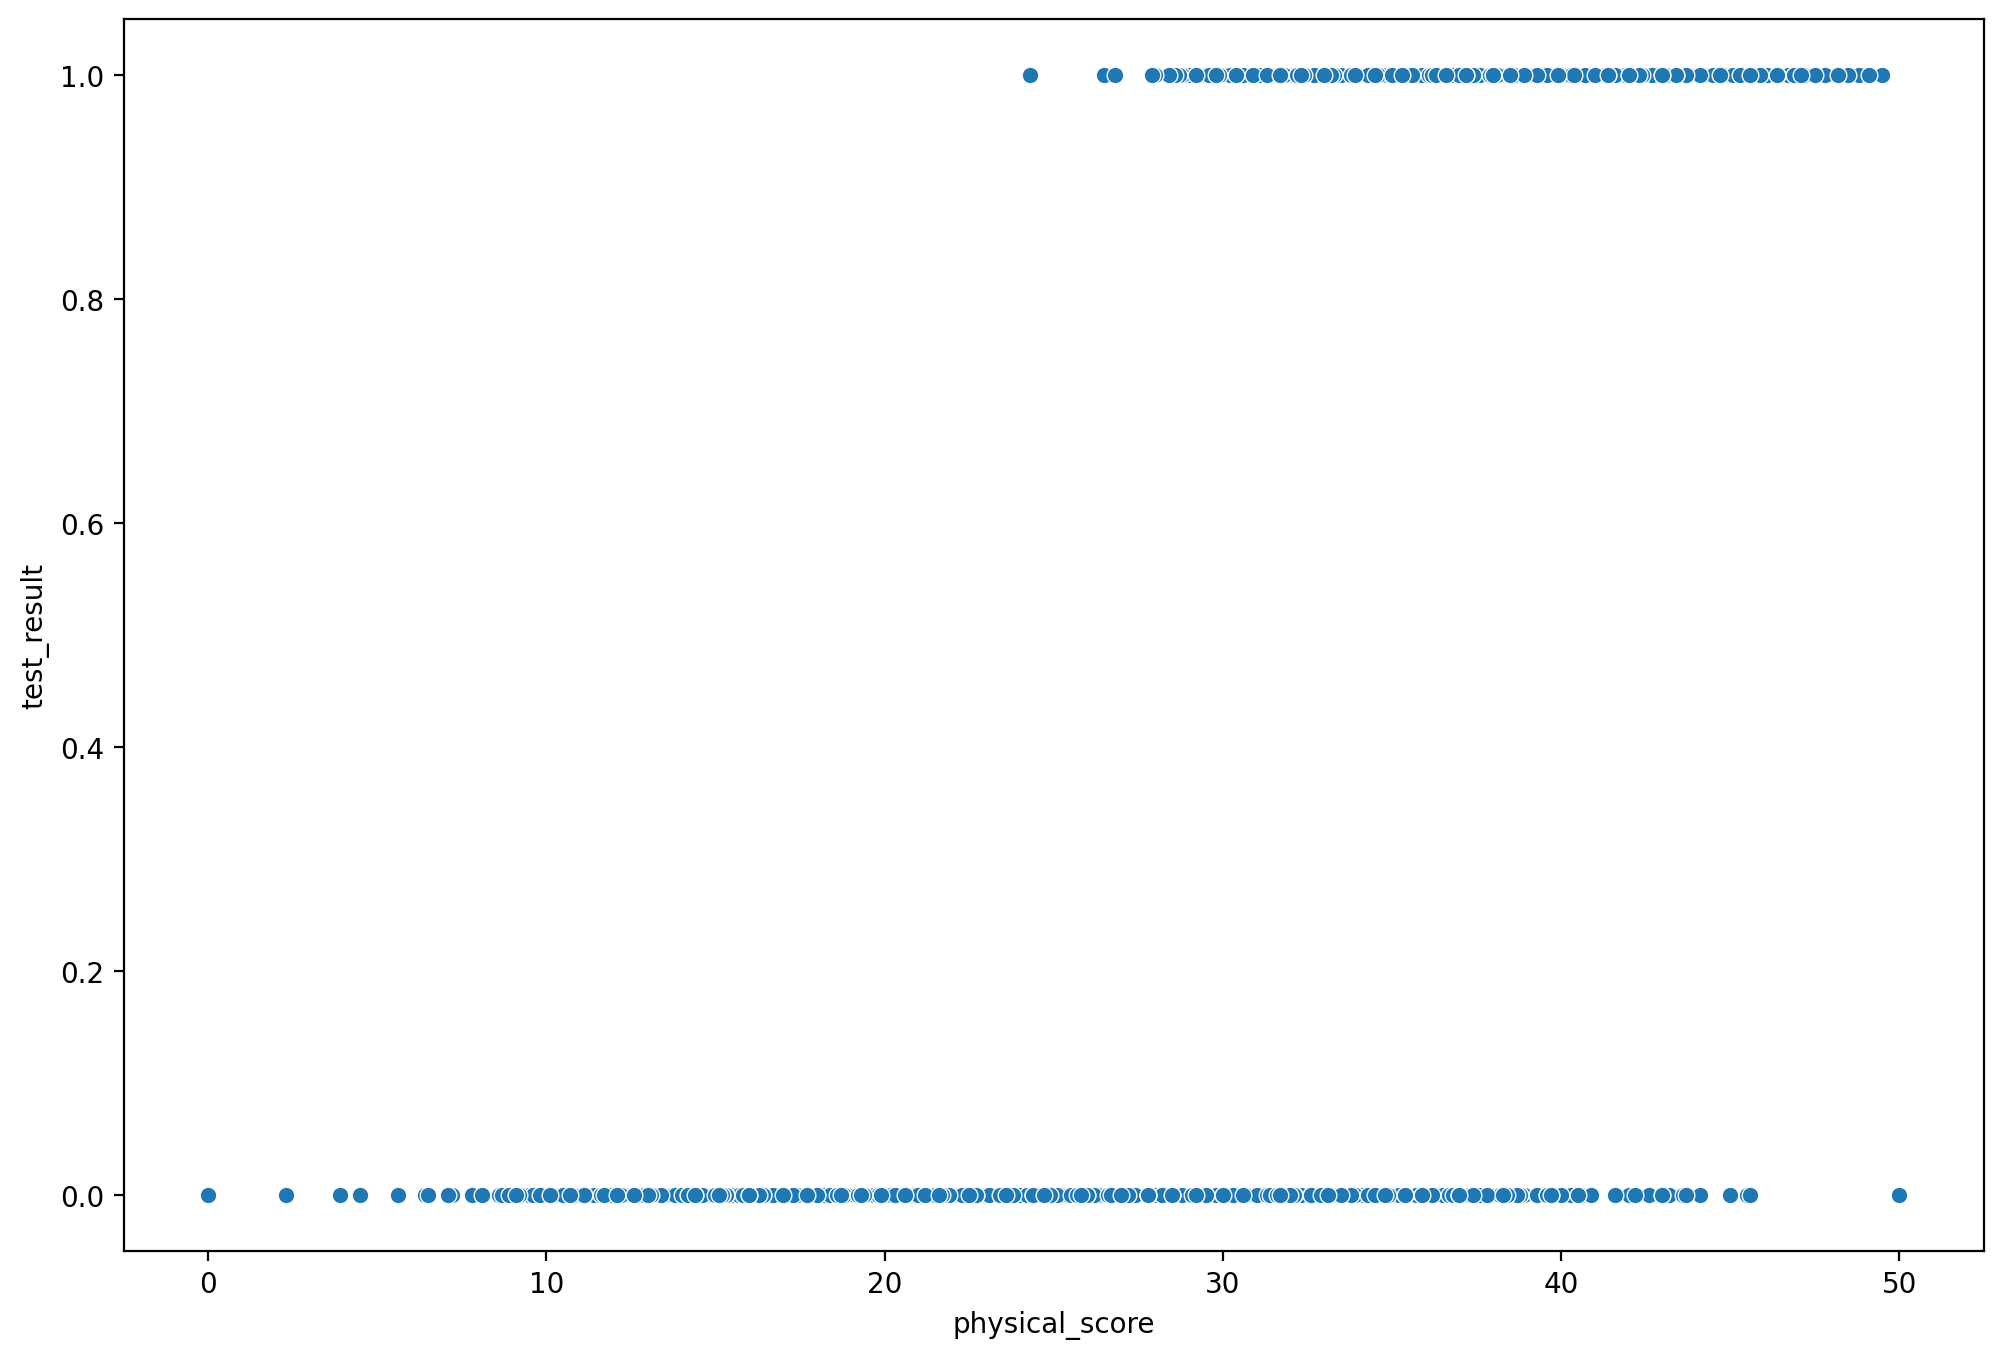

In [23]:
plt.figure(figsize=(12, 8 ), dpi=200)
sns.scatterplot(data=df, x='physical_score', y='test_result')
plt.show()

В таком случае можно также построить график boxplot, так как мы видим распределение точек для каждого из классов. Если же у нас небольшое количество признаков, то можно попробовать построить трехмерный график. Различные виды графиков можно найти с помощью поиска по фразе "3d matplotlib scatter plot", например: https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

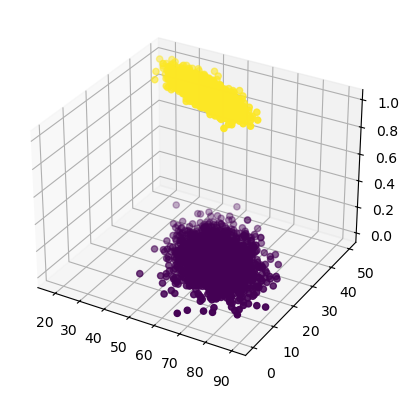

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=df['age'], ys=df['physical_score'], zs=df['test_result'], c=df['test_result'])
plt.show()

Информативность такого графика будет зависеть от конкретных данных. Такое идальное разбиение точек на два кластера по оси z было получено потому, что по оси z была отложена целевая переменная. В других задачах, по оси z, можно отложить какой-то третий признак, а раскраску точек - сделать по целевой переменной.

## Подготовка данных

### Разбиение данных

In [27]:
# axis=1 для колонок
X = df.drop('test_result', axis=1)
y = df['test_result']

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Масштабирование данных

In [33]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [37]:
scaled_X_train = scaler.fit_transform(X_train)

In [39]:
scaled_X_test = scaler.transform(X_test)

## Создаем модель логистической регрессии

In [41]:
from sklearn.linear_model import LogisticRegression

In [43]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='deprecated', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
 |  that regularization is applied by default**. It can handle both dense
 |  and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit
 |  floats for optimal performance; any other input format will be converted
 |  (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solvers s

Параметр `C` - отвечает за силу применения регуляризации.

Параметр `penalty` - может принимать значения *l1, l2, elasticnet, None*, отвечает за добавление штрафного слагаемого для регуляризации. Причём, это штрафное слагаемое добавляет дополнительные гиперпараметры.

In [45]:
log_model = LogisticRegression()

### Обучаем модель

In [47]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

### Интерпретация коэффициентов
На что обратить внимание:

* Эти коэффициенты характеризуют *шансы (odds)*, их нельзя интепретировать напрямую, как мы это делали для линейной регрессии.
* Мы обучали модель на *масштабированной* версии данных
* Намного проще понять и интерпретировать связь между коэффициентами (между одним коэффициентом и другим), чем связь между этими коэффициентами и целевой переменной.

Можно прочитать подробнее в статьях:
* https://stats.idre.ucla.edu/stata/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/
* https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

### Соотношение "odds ratio"
Для непрерывной независимой переменной, соотношение "odds ratio" вычисляется так:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/18dc1087bc50b9c1afee6820aad1858704b43ea3" >

Эта экспоненциальная связь служит интерпретацией для $$\beta _{1}$$ 

Шансы odds умножаются на $${e^{\beta _{1}}}$$ при каждом увеличении x на единицу.

In [49]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

Здесь для age - коэффициент отрицательный, значит - чем выше значение age, тем меньше вероятность класса 1(успешное прохождение аудио-теста). Для признака physical_score мы видим положительный коэффициент, так что чем лучше физическая форма человека, тем выше вероятность пройти тест.

Также, исходя из величин коэффициентов можно сделать вывод о том, что physical_score значительно больше влияет на целевую переменную, чем age.

Чтобы получить соотношения "odds ratio", достаточно взять экспоненту от каждого из коэффициентов. Вы итоге мы можем понять, как увеличение или уменьшение на единицу той или иной переменной влияет на шансы (odds) пройти аудио-тест.

In [51]:
# age,physical_score
np.exp(log_model.coef_[0])

array([ 0.38667248, 31.86440204])

Интерпретация:

* Мы можем ожидать, что шансы (odds) пройти аудио-тест уменьшаются (исходный коэффициент был отрицательный) при увеличении возраста на единицу.
* Мы можем ожидать, что шансы (odds) пройти аудио-тест увеличиваются (исходный коэффициент был положительный) при увеличении признака "физическое здоровье" на единицу.
* Сравнивая значения ratio между собой, мы видим, что признак physical_score обладает более сильной способностью влиять на предсказание, чем признак age.

## Точность модели на задачах классификации

**Важно в будущих версиях Scikit-Learn поменяется синтаксис для следующих методов:**
- вместо plot_confusion_matrix нужно будет использовать ConfusionMatrixDisplay.from_estimator или ConfusionMatrixDisplay.from_predictions.
- вместо plot_precision_recall_curve нужно будет использовать PrecisionRecallDisplay.from_estimator и PrecisionRecallDisplay.from_predictions
- вместо plot_roc_curve нужно будет использовать RocCurveDisplay.from_estimator и RocCurveDisplay.from_predictions

In [53]:
y_pred = log_model.predict(scaled_X_test)

Посмотрим значения целевой переменной

In [55]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

Также можно посмотреть вероятности

In [57]:
y_pred_proba = log_model.predict_proba(scaled_X_test)
y_pred_proba

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

Здесь для каждой точки мы получаем список из двух вероятностей - отдельно вероятность принадлежности к классу 0 и отдельно вероятность принадлежности к классу 1.

## Метрики оценки модели

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [63]:
accuracy_score(y_test, y_pred)

0.93

Для нашей модели метрика Accuracy равна 93%. Это означает, что если у нас есть только age и physical_score, то в 93% случаев - модель выдает правильные предсказания того, пройдёт человек аудио-тест или нет.

In [67]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

Мы получаем матрицу 2x2 - это:  
True Positive True Negative  
False Positive False Negative

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay

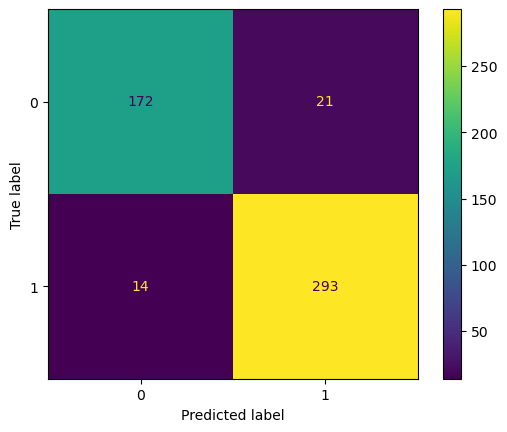

In [72]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

Мы получаем матрицу ошибок. Это те же самые 4 значения, которые мы видили выше, но теперь у нас есть метки по осям. 

Если модель работает хорошо, то для False Positive и False Negative надо получить такие значения, которые будут сильно отличаться по цвету от True Positive и True Negative.

**Важно: эти значения следует сравнивать с общим количеством всех случаев. Либо можно нормализовать эти значения, чтобы они менялись от 0 до 1.**

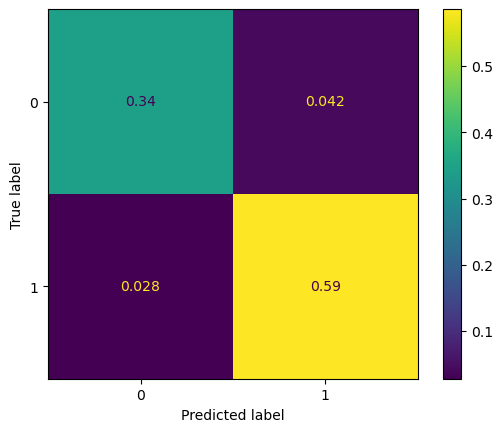

In [75]:
# Нормализация по всем значениям
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test, normalize='all')

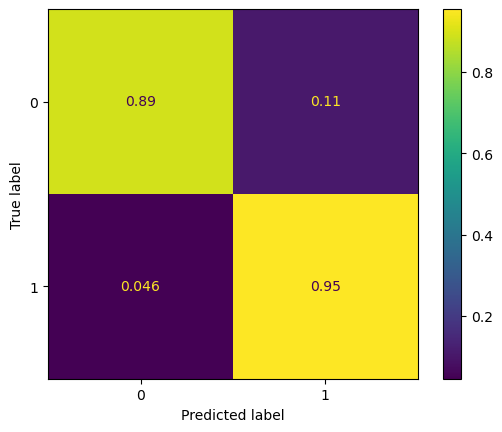

In [77]:
# Нормализация только по истинным значениям
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test, normalize='true')

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



В этой таблице метрики: *precision, recall, f1-score* - вычислены отдельно для каждого класса.

Метрика *recall* для отдельного класса отвечает на вопрос - как часто мы находим значения этого класса из всего набора значений этого класса.  
Метрика *precision* для отдельного класса отвечает на вопрос - как часто мы правильно классифицируем случаи этого класса из всего набора значений этого класса.  
*f1-score* - гармоническое среднее между precision и recall.  
*support* - количество случаев в том или ином классе.

**ЗДЕСЬ РЕЧЬ ИДЁТ ТОЛЬКО О ТЕСТОВОМ НАБОРЕ ДАННЫХ - ПОЭТОМУ ОБЩЕЕ ЧИСЛО РАВНО 500!!!**

Также есть строки: *macro avg* и *weighted avg*.  
*macro avg* - это обычное усреднение.  
*weighted avg* - это усреднение взвешенное с учётом количества количества случаев в каждом из классов, оно является полезным в том случае, если классы сильно несбалансированы. В нашем примере классы достаточно хорошо сбалансированы, поэтому *macro avg* и *weighted avg* примерно равны друг другу.

Мы получили общую картину с метриками, но если необходимо просто вычислить метрики *precision* и *recall*, то можно сделать следующее:

In [85]:
from sklearn.metrics import precision_score, recall_score

In [87]:
precision_score(y_test, y_pred)

0.9331210191082803

Это метрика *precision* не отдельно для каждого класса, а в целом для всей модели.

In [90]:
recall_score(y_test, y_pred)

0.9543973941368078

Это метрика *recall* на уровне всех данных. Это число не присутствует в отчёте *classification_report* потому что в нем *recall* вычисляется для отдельных классов, а затем эти значения усредняются.

В итоге, можно сказать, что наша модель показывает правильные результаты от 93 до 95% случаев по разным метрикам оценки.

In [93]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

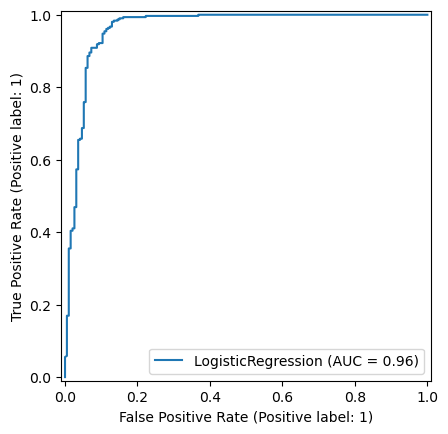

In [95]:
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)

**График можно отредактировать с помощью matplotlib**

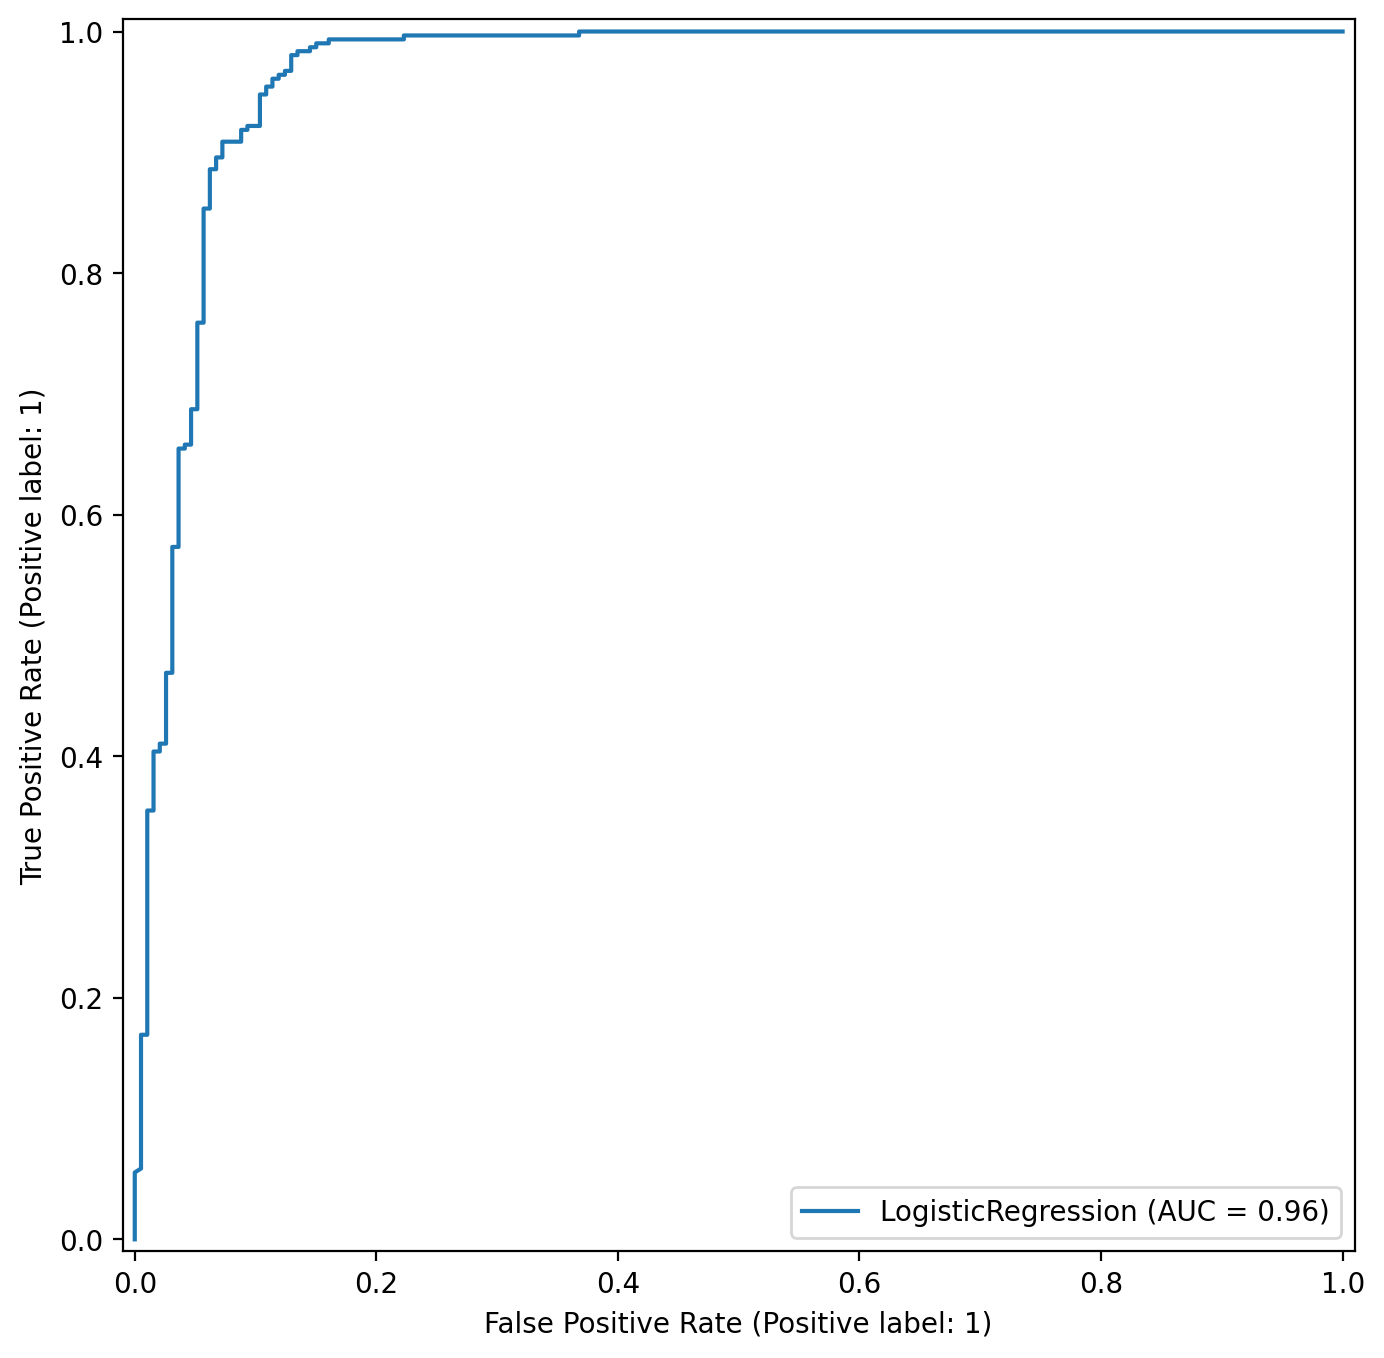

In [99]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test, ax=ax)
plt.show()

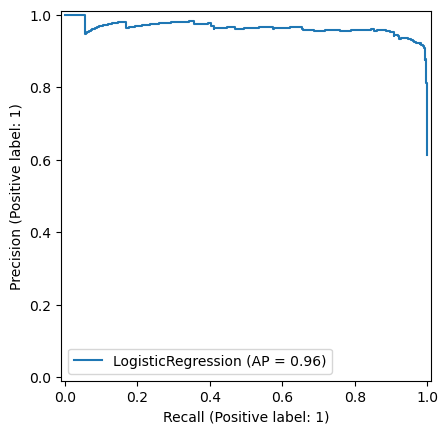

In [102]:
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)

### Как получить вероятности для каждого из классов

In [105]:
log_model.predict_proba(scaled_X_test)[0]

array([0.02380517, 0.97619483])

In [107]:
y_test[0]

1

Истинное значение для y_test - это класс 1, и модель с вероятностью 97% предсказывает класс 1, а с вероятностью 2,3% предсказывает класс 0.

In [110]:
log_model.predict(scaled_X_test)[0]

1